### FBP: Frequency Band Power

In [7]:
import sys
import os
sys.path.insert(0, os.path.abspath('../..'))
from scipy.io import loadmat
from pathlib import Path
import matplotlib.patches as patches
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
# the following import is required for matplotlib < 3.2:
from mpl_toolkits.mplot3d import Axes3D  # noqa
from scipy import stats
from scipy.stats import ttest_ind, ttest_rel, mannwhitneyu
import mne
import eeg_analysis.funcs4eeg as fe
import re
import imp
import ast
import behavior.func4behav as fb

imp.reload(fe)
imp.reload(fb)

<module 'behavior.func4behav' from 'c:\\Users\\Tianyi Zheng\\OneDrive - neuron.t.u-tokyo.ac.jp\\Documents\\zheng\\mywork\\attention_tES\\tes-attention\\processing\\behavior\\func4behav.py'>

In [5]:
real_ids = [1, 3, 4, 5, 9, 12, 13, 17, 18]
sham_ids = [2, 6, 7, 8, 10, 11, 14, 15, 16]

bands = [[4, 7], [8, 12], [12.5, 30], [30, 60], [60, 100]]
band_names = ['theta', 'alpha', 'beta', 'gamma', 'high gamma']

### power over the entire trial

In [6]:
case = 'endo'
sham_before, sham_after, real_before, real_after = fe.pipeline_FBP_allsubs(case)

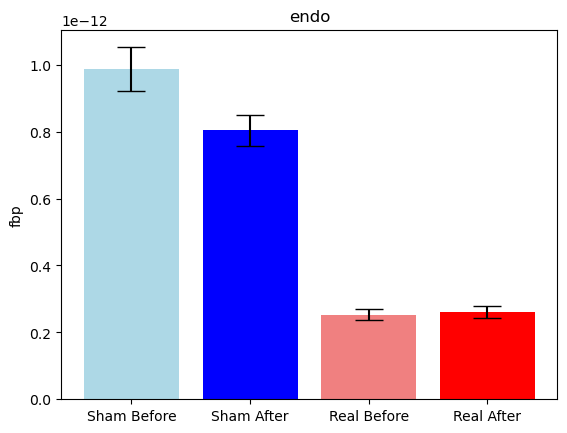

In [15]:
band = 4
rt_sham_before = sham_before[band, 1, :]
rt_sham_after = sham_after[band, 1, :]
rt_real_before = real_before[band, 1, :]
rt_real_after = real_after[band, 1, :]
# Calculate means
means = [np.mean(sham_before[band, 1, :]), np.mean(sham_after[band, 1, :]), np.mean(real_before[band, 1, :]), np.mean(real_after[band, 1, :])]

# Calculate standard errors
std_errors = [
    np.std(sham_before[band, 1, :]) / np.sqrt(len(sham_before[band, 1, :])), np.std(sham_after[band, 1, :]) / np.sqrt(len(sham_after[band, 1, :])),
    np.std(real_before[band, 1, :]) / np.sqrt(len(real_before[band, 1, :])), np.std(real_after[band, 1, :]) / np.sqrt(len(real_after[band, 1, :]))
]

# Calculate t-tests
_, p_sham = mannwhitneyu(rt_sham_before, rt_sham_after)
_, p_real = mannwhitneyu(rt_real_before, rt_real_after)
_, p_before = mannwhitneyu(rt_sham_before, rt_real_before)
_, p_after = mannwhitneyu(rt_sham_after, rt_real_after)


# Calculate percentage changes
percent_change_sham = ((np.mean(rt_sham_after) - np.mean(rt_sham_before)) / np.mean(rt_sham_before)) * 100
percent_change_real = ((np.mean(rt_real_after) - np.mean(rt_real_before)) / np.mean(rt_real_before)) * 100

# Bar chart
labels = ['Sham Before', 'Sham After', 'Real Before', 'Real After']
colors = ['lightblue', 'blue', 'lightcoral', 'red']

fig, ax = plt.subplots()

bars = ax.bar(labels, means, yerr=std_errors, color=colors, capsize=10)

# Add p-values
heights = [bar.get_height() + error for bar, error in zip(bars, std_errors)]
fsize = 13
# ax.text(0.5, heights[0] + 2, f'p = {p_sham*4:.4f}', ha='center', va='bottom', fontsize=fsize)
# ax.text(2.5, heights[2] + 2, f'p = {p_real*4:.4f}', ha='center', va='bottom', fontsize=fsize)
# ax.text(1, heights[0] + 9, f'p = {p_before*4:.4f}', ha='center', va='bottom', fontsize=fsize)
# ax.text(2, heights[2] + 9, f'p = {p_after*4:.4f}', ha='center', va='bottom', fontsize=fsize)

# # Add percentage changes
# ax.text(0.5, heights[0] + 1, f'{percent_change_sham:.1f}%', ha='center', va='top', color='blue', fontsize=fsize)
# ax.text(2.5, heights[2] + 1, f'{percent_change_real:.1f}%', ha='center', va='top', color='red', fontsize=fsize)

# Add some additional formatting if desired
ax.set_ylabel('fbp')
ax.set_title(case)
# ax.set_ylim([250, 400])  # Adjust as needed

plt.show()

In [8]:
subject_id = 18
behav_sham_before, behav_sham_after, behav_real_before, behav_real_after, rt_means, rt_std_errors = fe.reaction_time_table(case)
trials_before, trials_after = fe.get_inuse_trials(subject_id, behav_real_before, behav_real_after)

eeg_before, eeg_after = fe.load_eeg(subject_id)
events, event_dict = fe.make_default_events(eeg_before)
picked_events, picked_events_dict = fe.make_custom_events(eeg_before, events, event_dict, trials_before, fe.translate_case(case))

In [107]:
trial_fixations = picked_events[picked_events[:, 2] == 1]
trial_stims = picked_events[picked_events[:, 2] == 11]
trial_start_times = trial_fixations[:,0] # time steps of fixation onsets
trial_end_times = (trial_stims[:,0] + (1200*1.5)).astype(int) # time steps of stimulus onsets

data = eeg_before.get_data()[1:33,:] # 32 channels

for i, end_time in enumerate (trial_end_times):
    trial = data[:,trial_start_times[i]:end_time]
    print(trial.shape)

(32, 6046)
(32, 5439)
(32, 6040)
(32, 5440)
(32, 6041)
(32, 6038)
(32, 6039)
(32, 6040)
(32, 5441)
(32, 5441)
(32, 5439)
(32, 6040)
(32, 6039)
(32, 5439)
(32, 6040)
(32, 5442)
(32, 6040)
(32, 5439)
(32, 5440)
(32, 5440)
(32, 6040)
(32, 5438)
(32, 6040)
(32, 5440)
(32, 5438)
(32, 6039)
(32, 6040)
(32, 6041)
(32, 6040)
(32, 5441)
(32, 6041)
(32, 5439)
(32, 5441)
(32, 6038)
(32, 5438)
(32, 6038)
(32, 5440)
(32, 5440)
(32, 5441)
(32, 5438)
(32, 5440)
(32, 6039)
(32, 6041)
(32, 5439)
(32, 5440)
(32, 6039)
(32, 6039)
(32, 6040)
(32, 5441)
(32, 6040)
(32, 6039)
(32, 5441)
(32, 6040)
(32, 5439)
(32, 6041)
(32, 5440)
(32, 6040)
(32, 5438)
(32, 5439)


In [108]:
data[:,trial_start_times[0]:7243].shape

(32, 6043)

### separate by 1 hz in frequency, plot heatmap?

### Evoked power change